In [2]:
import tensorflow as tf
import sys
import numpy as np

In [3]:
## sequential model

model_seq = tf.keras.Sequential(name = 'sequential_model')
model_seq.add(tf.keras.Input(shape=(32), name = 'inputs'))
model_seq.add(tf.keras.layers.Dense(64, activation='relu', name='hidden1'))
model_seq.add(tf.keras.layers.Dense(32, activation='relu', name='hidden2'))
model_seq.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))
              
model_seq.summary()

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                2112      
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [8]:
## functional model

inputs = tf.keras.layers.Input(shape=(32,))
dense1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
dense2 = tf.keras.layers.Dense(32, activation='relu')(dense1)
dense3 = tf.keras.layers.Dense(20, activation='relu')(dense1)
dense4 = tf.concat([dense2, dense3], axis=1)
outputs = tf.keras.layers.Dense(10, activation='softmax')(dense4)

model_functional = tf.keras.Model(inputs=inputs, outputs=outputs)
model_functional.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 64)           2112        ['input_5[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 32)           2080        ['dense_15[0][0]']               
                                                                                                  
 dense_17 (Dense)               (None, 20)           1300        ['dense_15[0][0]']               
                                                                                            

In [15]:
## subclassing model

class mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(mymodel, self).__init__(name='mymodel')
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='softmax')
        
    def call(self, inputs):     # 개체생성시 자동호출
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x
    
MyModel = mymodel(64, 32, 10)

In [16]:
MyModel.build(input_shape=(1, 32))
MyModel.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            multiple                  2112      
                                                                 
 dense_26 (Dense)            multiple                  2080      
                                                                 
 dense_27 (Dense)            multiple                  330       
                                                                 
Total params: 4,522
Trainable params: 4,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MyModel.copile(loss='categorical_crossentropy',
              optimizer='adam'
              matrics='acc')
MyModel.fit(......)

In [22]:
dataset = np.loadtxt('./datasets/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

X = dataset[:, :-1]
y = dataset[:, -1]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
class ModelIndian(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(ModelIndian, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x
    
my_model = ModelIndian(12, 8, 1)

In [31]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./datasets/best_mode.h5',
                                                verbose=1,
                                                save_best_only=True,
                                                save_weights_only=True
                                               )
earlystop = tf.keras.callbacks.EarlyStopping(patience=5)

In [32]:
my_model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
history = my_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                       epochs=100, batch_size=24,
                       callbacks=[checkpoint, earlystop])

Epoch 1/100
 1/26 [>.............................] - ETA: 14s - loss: 4.3676 - acc: 0.4583
Epoch 1: val_loss improved from inf to 2.42558, saving model to ./datasets\best_mode.h5
26/26 [==============================] - 1s 12ms/step - loss: 4.1592 - acc: 0.4202 - val_loss: 2.4256 - val_acc: 0.5065
Epoch 2/100
 1/26 [>.............................] - ETA: 0s - loss: 4.4285 - acc: 0.4583
Epoch 2: val_loss improved from 2.42558 to 1.25806, saving model to ./datasets\best_mode.h5
26/26 [==============================] - 0s 4ms/step - loss: 1.6114 - acc: 0.5554 - val_loss: 1.2581 - val_acc: 0.5649
Epoch 3/100
 1/26 [>.............................] - ETA: 0s - loss: 2.0511 - acc: 0.5000
Epoch 3: val_loss improved from 1.25806 to 1.07242, saving model to ./datasets\best_mode.h5
26/26 [==============================] - 0s 4ms/step - loss: 1.0215 - acc: 0.6140 - val_loss: 1.0724 - val_acc: 0.6104
Epoch 4/100
26/26 [==============================] - ETA: 0s - loss: 0.9233 - acc: 0.6173
Epoch 4: 

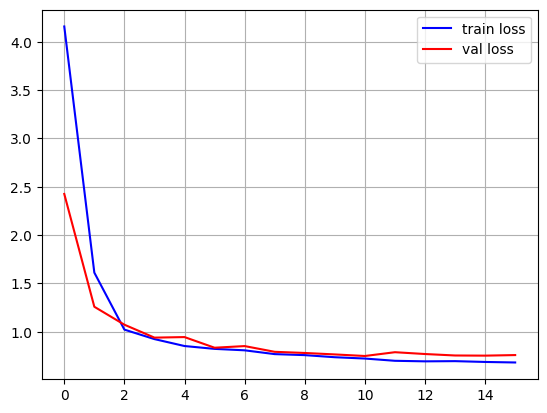

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='train loss')
plt.plot(history.history['val_loss'], 'r', label='val loss')
plt.legend()
plt.grid()
plt.show()

In [35]:
my_model.load_weights('./datasets/best_mode.h5')

## 더미데이터를 이용한 감정 분석

In [42]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']
# print(samples)
targets = [[1], [0], [1], [1], [0], [1]]

In [37]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

In [40]:
display(samples)
display(sequences)
print(tokenizer.word_index)

['너 오늘 이뻐 보인다',
 '나는 오늘 기분이 더러워',
 '끝내주는데, 좋은 일이 있나봐',
 '나 좋은 일이 생겼어',
 '아 오늘 진짜 짜증나',
 '환상적인데, 정말 좋은거 같아']

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [43]:
labels = np.array(targets)

In [46]:
batch_size = 2
epochs = 100
word_index = tokenizer.word_index
vocap_size = len(word_index) + 1

emb_size = 128
hidden_dim = 256
output_dim = 1

In [49]:
## Sequetial API

# model_seq = tf.keras.Sequential(name='sequential')
# model_seq.add(tf.keras.layers.Input(shape=(4, )))
# model_seq.add(tf.keras.layers.Embedding(vocap_size, emb_size))
# model_seq.add(tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)))
# model_seq.add(tf.keras.layers.Dense(hidden_dim, activation='relu'))
# model_seq.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))
# ==
model_seq = tf.keras.Sequential([tf.keras.layers.Input(shape=(4, )),
                                tf.keras.layers.Embedding(vocap_size, emb_size),
                                tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
                                tf.keras.layers.Dense(hidden_dim, activation='relu'),
                                tf.keras.layers.Dense(output_dim, activation='sigmoid')]
                               )

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 128)            2688      
                                                                 
 lambda_1 (Lambda)           (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               33024     
                                                                 
 dense_37 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_seq.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics='acc')
model_seq.fit(sequences, targets, epochs=epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 0.6942 - acc: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6793 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6651 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6491 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6357 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6171 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5938 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5700 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5413 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5080 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4687 

3/3 [==============================] - 0s 3ms/step - loss: 8.2024e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 3ms/step - loss: 8.0182e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 6ms/step - loss: 7.8441e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 3ms/step - loss: 7.6770e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 3ms/step - loss: 7.5100e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 3ms/step - loss: 7.3515e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 2ms/step - loss: 7.1972e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 3ms/step - loss: 7.0457e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 3ms/step - loss: 6.8992e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 3ms/step - loss: 6.7515e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

In [54]:
## functional API
inputs = tf.keras.layers.Input(shape=(4, ))
emb_out = tf.keras.layers.Embedding(vocap_size, emb_size)(inputs)
mean_out = tf.reduce_mean(emb_out, axis=1)
hidden1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(mean_out)
hidden2 = tf.keras.layers.Dense(hidden_dim, activation='sigmoid')(hidden1)

ef_model = tf.keras.Model(inputs=inputs, outputs=hidden2)
ef_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_3 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 128)              0         
 mbda)                                                           
                                                                 
 dense_40 (Dense)            (None, 256)               33024     
                                                                 
 dense_41 (Dense)            (None, 256)               65792     
                                                                 
Total params: 101,504
Trainable params: 101,504
Non-trainable params: 0
_____________________________________________________

In [52]:
## subclassing API

class EmotionModel(tf.keras.Model):
    def __init__(self, vocap_size, emb_size, hidden_dim, output_dim):
        super(EmotionModel, self).__init__()
        self.embad = tf.keras.layers.Embedding(vocap_size, emb_size)
#         self.labbda = tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1))
        self.dense1 = tf.keras.layers.Dense(hidden_dim, activation='relu')
        self.dense2 = tf.keras.layers.Dense(output_dim, activation='sigmoid')
        
    def call(self, inputs):
        x = self.embad(inputs)
        x = tf.reduce_mean(x, axis=1)
        x = self.dense1(x)
        x = self.dense2(x)
        
        return x
    
e_model = EmotionModel(vocap_size, emb_size, hidden_dim, output_dim)

In [53]:
model_seq.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics='acc')
model_seq.fit(sequences, targets, epochs=epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.6917 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6741 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6581 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6416 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6255 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6040 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5820 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5532 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5247 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4887 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4496 

3/3 [==============================] - 0s 2ms/step - loss: 7.8492e-04 - acc: 1.0000
Epoch 89/100
3/3 [==============================] - 0s 3ms/step - loss: 7.6768e-04 - acc: 1.0000
Epoch 90/100
3/3 [==============================] - 0s 3ms/step - loss: 7.5145e-04 - acc: 1.0000
Epoch 91/100
3/3 [==============================] - 0s 3ms/step - loss: 7.3430e-04 - acc: 1.0000
Epoch 92/100
3/3 [==============================] - 0s 3ms/step - loss: 7.1795e-04 - acc: 1.0000
Epoch 93/100
3/3 [==============================] - 0s 3ms/step - loss: 7.0355e-04 - acc: 1.0000
Epoch 94/100
3/3 [==============================] - 0s 3ms/step - loss: 6.8874e-04 - acc: 1.0000
Epoch 95/100
3/3 [==============================] - 0s 3ms/step - loss: 6.7417e-04 - acc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 2ms/step - loss: 6.6029e-04 - acc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 2ms/step - loss: 6.4716e-04 - acc: 1.0000
Epoch 98/100
3/3 [=========================

## sklearn을 이용한 iris Machine learning

In [63]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
print(sklearn.__version__)

1.2.2


In [64]:
iris_data = load_iris()

iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
# print(iris_data['data'])
# print(iris_data['target'])
print(iris_data['feature_names'])
print(iris_data['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [83]:
iris = pd.DataFrame(iris_data['data'])
iris['target'] = iris_data['target']
iris.columns = ["sepal length","sepal width",'petal length','petal width','class']
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
setosa = iris[iris['class']==0]
versicolor = iris[iris['class']==1]
virginica = iris[iris['class']==2]

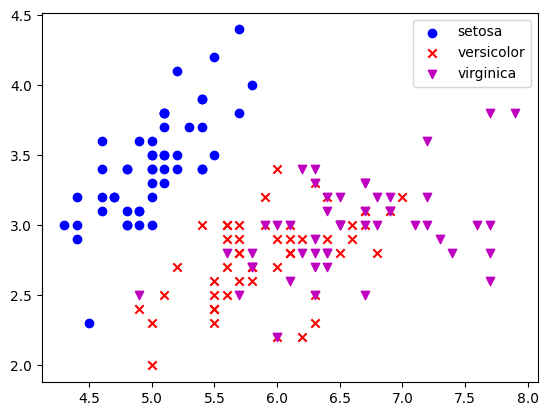

In [85]:
plt.scatter(setosa["sepal length"], setosa["sepal width"], marker='o', color='b', label='setosa')
plt.scatter(versicolor["sepal length"], versicolor["sepal width"], marker='x', color='r', label='versicolor')
plt.scatter(virginica["sepal length"], virginica["sepal width"], marker='v', color='m', label='virginica')

plt.legend()
plt.show()


In [69]:
## knn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], test_size=0.2)
X_train.shape

(120, 4)

In [72]:
ss = StandardScaler()
ss.fit(X_train)
Train_scaled = ss.transform(X_train)
Test_scaled = ss.transform(X_test)

In [74]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':range(1, 10)}
gs_knn = GridSearchCV(estimator=knn,
                     param_grid=params_knn,
                     scoring='accuracy', cv=5, n_jobs=-1)
gs_knn.fit(Train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [75]:
print(gs_knn.best_estimator_)
print(gs_knn.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.9583333333333334


In [86]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
knn.score(Test_scaled, y_test)

1.0